IMPORT LIBRARY

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import ipywidgets as widgets
from IPython.display import display

LOAD DATA

In [12]:
# Folder CSV saham
folder_path = "./lq45/"

# Ambil nama file dan buat dropdown simbol saham
symbols = sorted([f.replace(".csv", "") for f in os.listdir(folder_path) if f.endswith(".csv")])
symbol_dropdown = widgets.Dropdown(
    options=symbols,
    description='Pilih Simbol Saham:',
    value=symbols[0],
    style={'description_width': 'initial'}
)
display(symbol_dropdown)

Dropdown(description='Pilih Simbol Saham:', options=('ACES', 'ADRO', 'AKRA', 'AMMN', 'AMRT', 'ANTM', 'ARTO', '…

FILTER DATE

In [14]:
# Pilih tanggal mulai dan akhir
start_date = datetime(2024, 1, 1)
end_date = datetime.today()

# Load dan filter data berdasarkan dropdown
selected_symbol = symbol_dropdown.value
file_path = os.path.join(folder_path, f"{selected_symbol}.csv")
df = pd.read_csv(file_path)
df["date"] = pd.to_datetime(df["date"])

# Filter data 1 tahun terakhir
df_filtered = df[(df["date"] >= start_date) & (df["date"] <= end_date)].copy()

# Tampilkan 5 baris pertama
df_filtered.head()

,date,previous,open_price,first_trade,high,low,close,change,volume,value,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
1084,2024-01-02,720.0,725.0,730.0,730.0,710.0,715.0,-5.0,23084400.0,1.659111e+10,...,1055900.0,1.715000e+10,1.715000e+10,6.832560e+09,6021400.0,3890200.0,NaN,0.0,0.000000e+00,0.0
1085,2024-01-03,715.0,720.0,720.0,730.0,710.0,715.0,0.0,37076300.0,2.658182e+10,...,1418200.0,1.715000e+10,1.715000e+10,6.832560e+09,8899200.0,9528700.0,NaN,335736.0,2.397161e+08,6.0
1086,2024-01-04,715.0,715.0,715.0,745.0,715.0,735.0,20.0,65658500.0,4.815340e+10,...,2678000.0,1.715000e+10,1.715000e+10,6.832560e+09,14536700.0,35847500.0,NaN,3883500.0,2.846606e+09,1.0
1087,2024-01-05,735.0,740.0,740.0,760.0,735.0,750.0,15.0,63182600.0,4.739692e+10,...,1694700.0,1.715000e+10,1.715000e+10,6.832560e+09,11855200.0,19287100.0,NaN,151.0,1.131650e+05,3.0
1088,2024-01-08,750.0,750.0,750.0,755.0,730.0,735.0,-15.0,26862000.0,1.989306e+10,...,1095500.0,1.715000e+10,1.715000e+10,6.832560e+09,9853700.0,3224600.0,NaN,78.0,5.772000e+04,1.0


VISUALISASI HARGA SAHAM

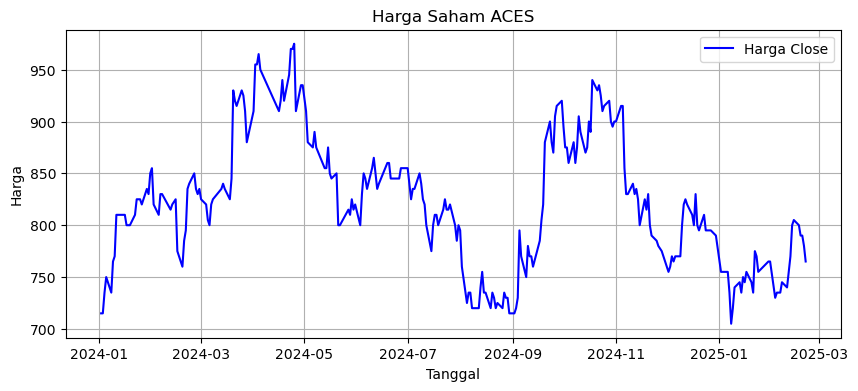

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(df_filtered["date"], df_filtered["close"], label="Harga Close", color='blue')
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.title(f"Harga Saham {selected_symbol}")
plt.grid(True)
plt.legend()
plt.show()


MODEL ARIMA

In [16]:
# Ambil data harga close
close_prices = df_filtered["close"].dropna().reset_index(drop=True)

# Tentukan parameter ARIMA terbaik secara otomatis
stepwise_model = auto_arima(close_prices, start_p=1, start_q=1,
                            max_p=3, max_q=3, seasonal=False,
                            trace=True, error_action='ignore', suppress_warnings=True)

# Fit model ARIMA
model = ARIMA(close_prices, order=stepwise_model.order)
model_fit = model.fit()

# Prediksi dengan ARIMA
pred = model_fit.predict(start=0, end=len(close_prices)-1)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2351.130, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2354.826, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2356.783, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2356.762, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2352.852, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2351.557, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2351.025, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2351.069, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2352.308, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2351.671, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2352.230, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2353.671, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2349.062, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2349.107, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]          

EVALUASI MODEL

In [17]:
def evaluate(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, pred)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    r2 = r2_score(true, pred)
    n = len(true)
    p = 1
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return mse, rmse, mae, mape, r2, adj_r2

mse, rmse, mae, mape, r2, adj_r2 = evaluate(close_prices, pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")


Mean Squared Error (MSE): 2226.4365
Root Mean Squared Error (RMSE): 47.1851
Mean Absolute Error (MAE): 16.1447
Mean Absolute Percentage Error (MAPE): 2.01%
R-squared: 0.4296
Adjusted R-squared: 0.4274


PLOT PREDIKSI DAN AKTUAL

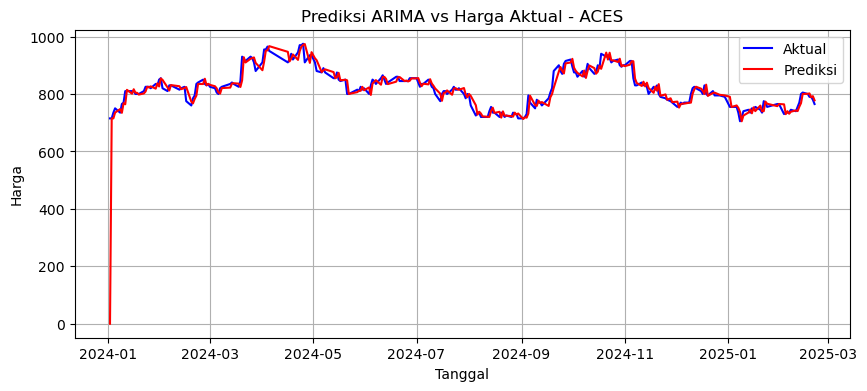

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(df_filtered["date"], close_prices, label="Aktual", color='blue')
plt.plot(df_filtered["date"], pred, label="Prediksi", color='red')
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.title(f"Prediksi ARIMA vs Harga Aktual - {selected_symbol}")
plt.legend()
plt.grid(True)
plt.show()

VISUALISASI ERROR

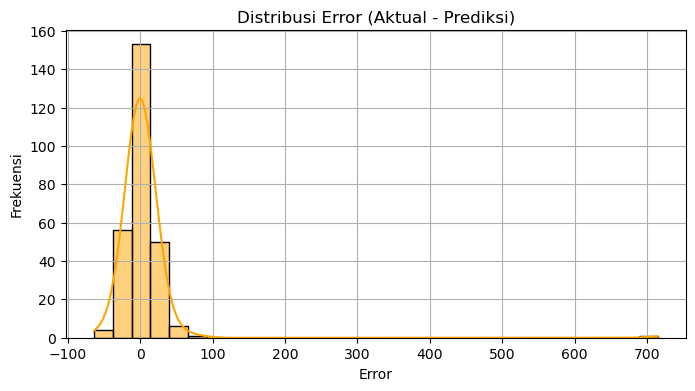

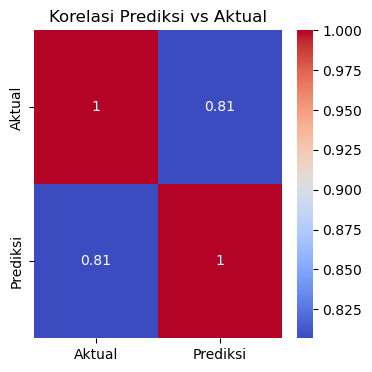

In [19]:
residuals = close_prices - pred

# Histogram error
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title("Distribusi Error (Aktual - Prediksi)")
plt.xlabel("Error")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

# Heatmap korelasi
plt.figure(figsize=(4, 4))
sns.heatmap(np.corrcoef([close_prices, pred]), annot=True, cmap="coolwarm",
            xticklabels=["Aktual", "Prediksi"], yticklabels=["Aktual", "Prediksi"])
plt.title("Korelasi Prediksi vs Aktual")
plt.show()


PREDIKSI

In [21]:
def prediksi_ke_depan(model_fit, last_date, jumlah_hari=45, harga_asli=None, tanggal_asli=None, label_saham="Saham"):
    """
    Menampilkan plot prediksi N hari ke depan dari model ARIMA yang sudah di-fit.

    Parameters:
    - model_fit: model ARIMA yang sudah dilatih
    - last_date: tanggal terakhir dari dataset
    - jumlah_hari: jumlah hari ke depan yang ingin diprediksi (default 45)
    - harga_asli: (opsional) data harga historis untuk digabung dalam plot
    - tanggal_asli: (opsional) tanggal historis untuk digabung dalam plot
    - label_saham: nama saham (string)
    """
    # Prediksi masa depan
    future_forecast = model_fit.forecast(steps=jumlah_hari)
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=jumlah_hari)

    # Visualisasi
    plt.figure(figsize=(12, 5))
    if harga_asli is not None and tanggal_asli is not None:
        plt.plot(tanggal_asli, harga_asli, label="Aktual", color="blue")
    plt.plot(future_dates, future_forecast, label=f"Prediksi {jumlah_hari} Hari Kedepan", color="green", linestyle="--")
    plt.xlabel("Tanggal")
    plt.ylabel("Harga Saham")
    plt.title(f"Prediksi {jumlah_hari} Hari Kedepan: {label_saham}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

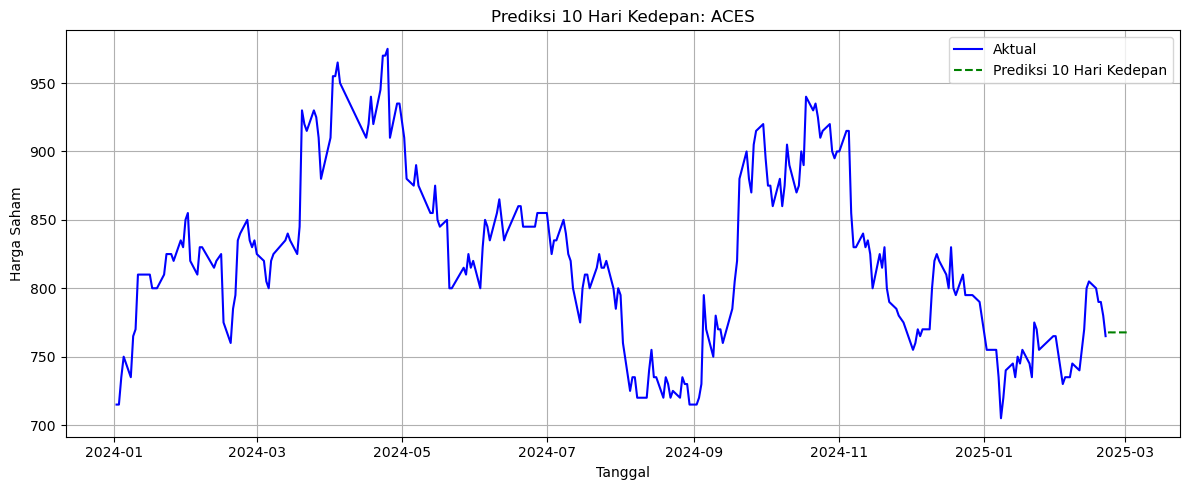

In [23]:
# Panggil fungsi prediksi ke depan setelah model ARIMA sudah dibuat dan di-fit
prediksi_ke_depan(
    model_fit=model_fit,
    last_date=df_filtered["date"].iloc[-1],
    jumlah_hari=10,
    harga_asli=close_prices,
    tanggal_asli=df_filtered["date"],
    label_saham=selected_symbol
)